Last modified by Soshant Bali on 12/1/2016

In [34]:
import pandas as pd
import numpy as np
import sklearn as sk
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [35]:
#Generate data
X=np.random.normal(0,1,100)
eps=np.random.normal(0,np.sqrt(0.25),100)
Y=-1+0.5*X + eps
#convert numpy arrays to pandas data frame
XY_df = pd.DataFrame({'Y':Y,'X':X})

(c) y is of length 100. β0 is -1, β1 is 0.5.

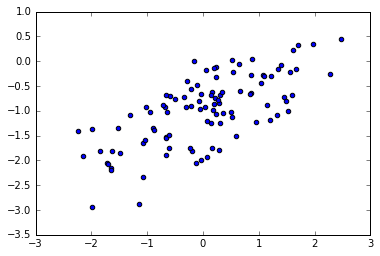

In [36]:
%matplotlib inline
plt.scatter(X,Y)

(d) linear relation between X and Y with positive slope

In [37]:
#linear regression
ols_model = sm.formula.ols(formula='Y ~ X', data=XY_df)
ols_result = ols_model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     93.36
Date:                Thu, 01 Dec 2016   Prob (F-statistic):           6.54e-16
Time:                        11:27:42   Log-Likelihood:                -73.054
No. Observations:                 100   AIC:                             150.1
Df Residuals:                      98   BIC:                             155.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.9986      0.051    -19.671      0.0

In [38]:
#calculate residual standard error
RSE_1 = np.sqrt(ols_result.mse_resid)
print(RSE_1)

0.507482579861


(e)$\hat{\beta_0}=-0.9326$ and $\hat{\beta_1}=0.5306$, which is very close to $\beta_0$ and $\beta_1$. Additionally, the actual coefficients are in the 95% confidence interval, for both intercept and slope.

(f) The scatter plot of data and fitted model is shown below

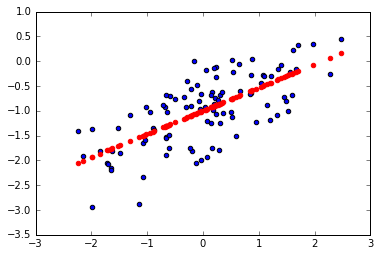

In [39]:
%matplotlib inline
plt.scatter(X,Y)
plt.scatter(X,ols_result.fittedvalues, color='red')

In [40]:
#Polynomial regression
ols_model=sm.formula.ols(formula='Y~ X + I(X**2)',data=XY_df)
ols_result=ols_model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     46.36
Date:                Thu, 01 Dec 2016   Prob (F-statistic):           7.41e-15
Time:                        11:27:54   Log-Likelihood:                -72.973
No. Observations:                 100   AIC:                             151.9
Df Residuals:                      97   BIC:                             159.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.9821      0.066    -14.977      0.0

In [41]:
#calculate residual standard error
RSE_2 = np.sqrt(ols_result.mse_resid)
print(RSE_2)

0.50967407964


(g) There is no evidence to show that adding the quadratic term improves the model fit because p-value of $X^2$ is high, i.e., 0.815

In [42]:
#Generate data
X=np.random.normal(0,1,100)
eps=np.random.normal(0,np.sqrt(0.05),100)
Y=-1+0.5*X + eps
#convert numpy arrays to pandas data frame
XY_df = pd.DataFrame({'Y':Y,'X':X})
#linear regression
ols_model = sm.formula.ols(formula='Y ~ X', data=XY_df)
ols_result = ols_model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     520.5
Date:                Thu, 01 Dec 2016   Prob (F-statistic):           5.44e-41
Time:                        11:27:59   Log-Likelihood:                 9.6279
No. Observations:                 100   AIC:                            -15.26
Df Residuals:                      98   BIC:                            -10.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.9990      0.022    -45.002      0.0

In [43]:
#calculate residual standard error
RSE_3 = np.sqrt(ols_result.mse_resid)
print(RSE_3)

0.22199160501


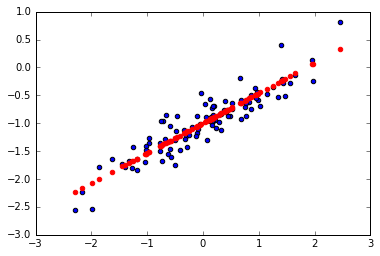

In [44]:
%matplotlib inline
plt.scatter(X,Y)
plt.scatter(X,ols_result.fittedvalues, color='red')

(h) note that $R^2$ increased from 0.494 to 0.834, as the variance of data decreased, because, a larger fraction of the variance can now be explained using the model. Additionally, the RSE also decreased from 0.507 to 0.222, as expected, because, RSE is really an estimate of the standard deviation of model error.

In [50]:
#Show that RSE is close to the model variance
print(np.power(0.507,2))
print(np.power(0.222,2))

0.257049
0.049284


(j)confidence intervals shrink with a reduction in noise